In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("housing.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = data.drop(["median_house_value"], axis = 1)
y = data['median_house_value']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

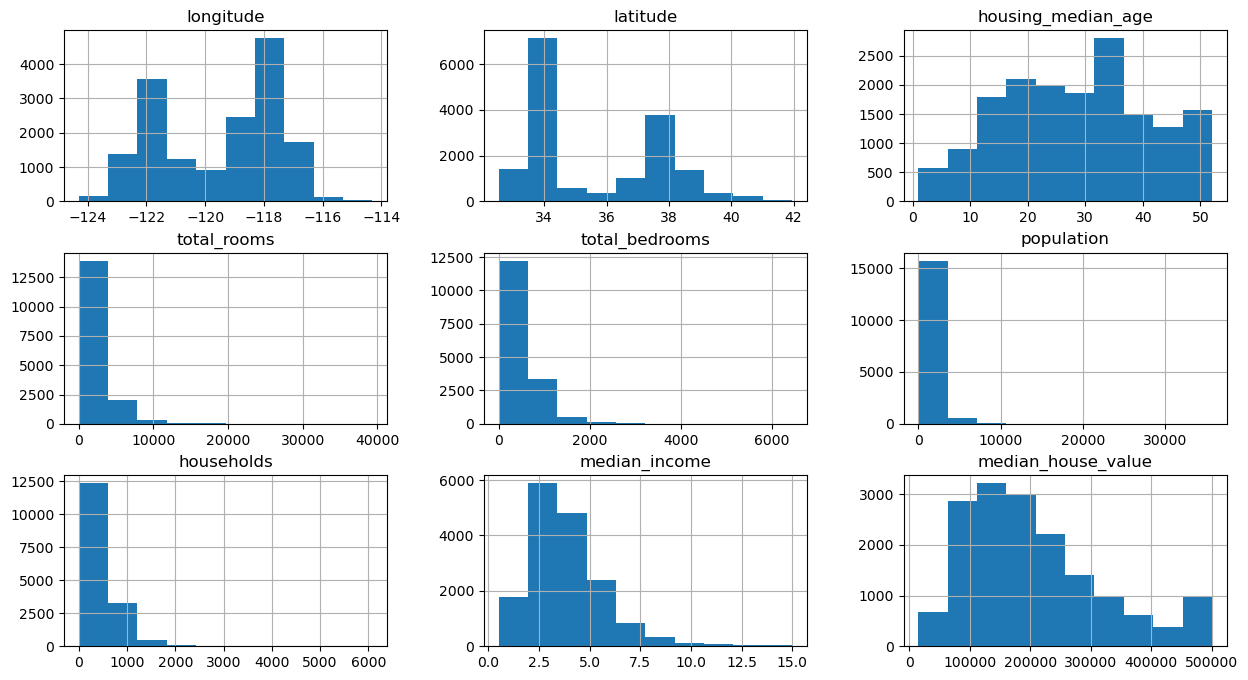

In [15]:
train_data.hist(figsize = (15,8))

<Axes: >

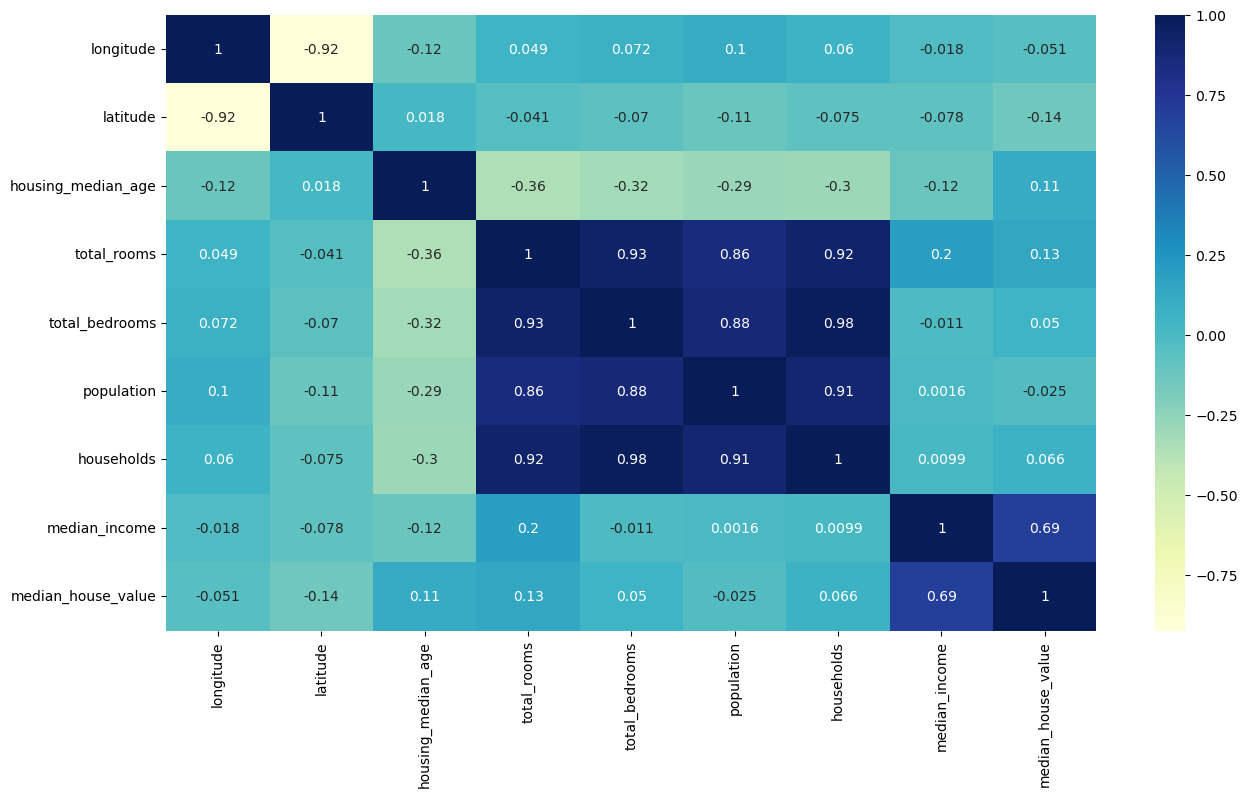

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot = True, cmap = "YlGnBu")

In [22]:
train_data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924053,-0.115528,0.049037,0.072123,0.104013,0.059698,-0.017887,-0.050709
latitude,-0.924053,1.000000,0.018397,-0.040885,-0.070094,-0.113189,-0.075260,-0.078050,-0.139992
housing_median_age,-0.115528,0.018397,1.000000,-0.357552,-0.315397,-0.290086,-0.297362,-0.115145,0.110513
total_rooms,0.049037,-0.040885,-0.357552,1.000000,0.929920,0.855321,0.918661,0.195476,0.134835
total_bedrooms,0.072123,-0.070094,-0.315397,0.929920,1.000000,0.875774,0.980110,-0.010982,0.050495
population,0.104013,-0.113189,-0.290086,0.855321,0.875774,1.000000,0.905018,0.001560,-0.024511
households,0.059698,-0.075260,-0.297362,0.918661,0.980110,0.905018,1.000000,0.009926,0.065628
median_income,-0.017887,-0.078050,-0.115145,0.195476,-0.010982,0.001560,0.009926,1.000000,0.692265
median_house_value,-0.050709,-0.139992,0.110513,0.134835,0.050495,-0.024511,0.065628,0.692265,1.000000


Data Preprocessing

In [23]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

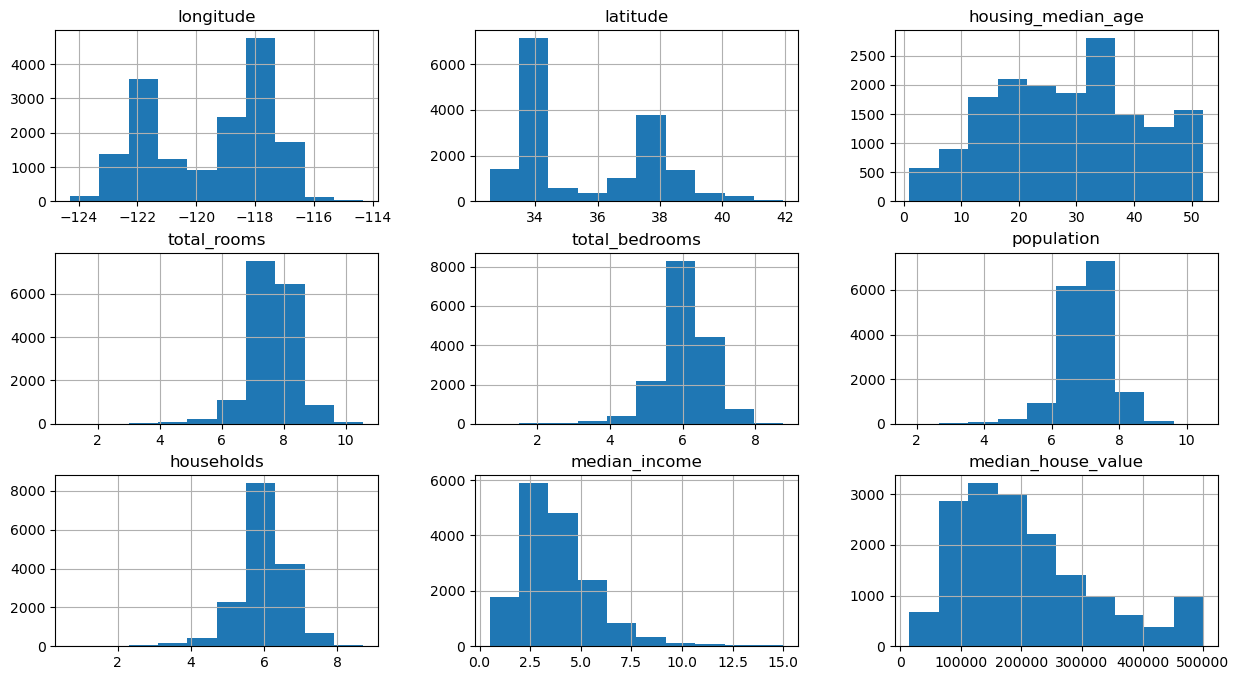

In [26]:
train_data.hist(figsize = (15,8))

In [27]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

<Axes: >

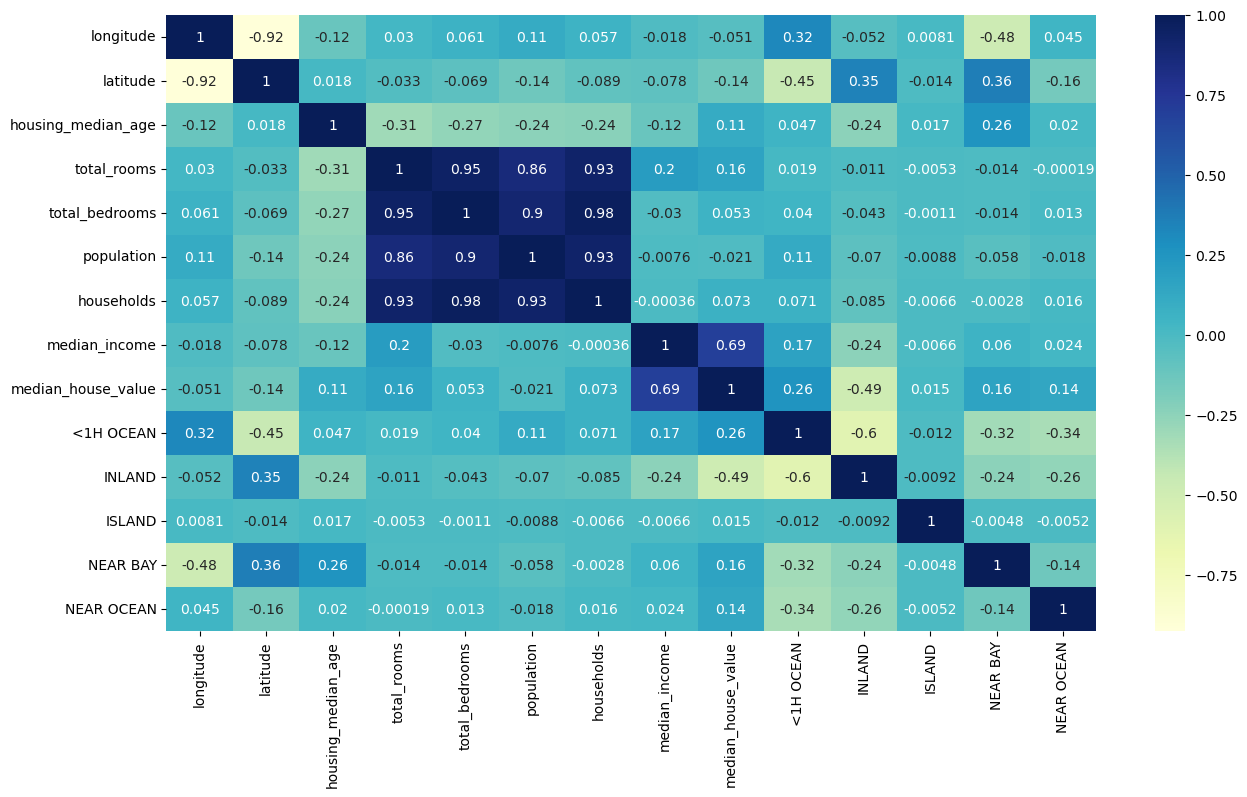

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot = True, cmap = "YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

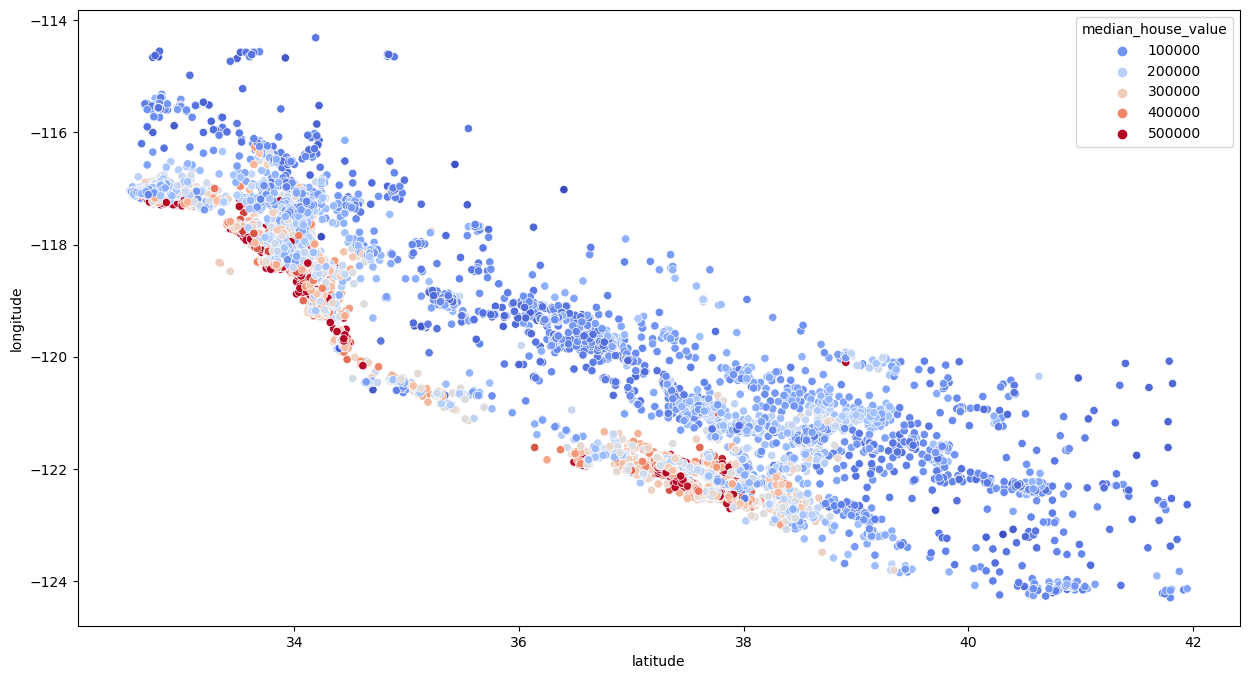

In [29]:
plt.figure(figsize= (15,8))
sns.scatterplot(x="latitude", y= "longitude",data = train_data, hue="median_house_value",palette="coolwarm")

In [31]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data['total_rooms']
train_data['households_rooms'] = train_data["total_rooms"] / train_data['households']

<Axes: >

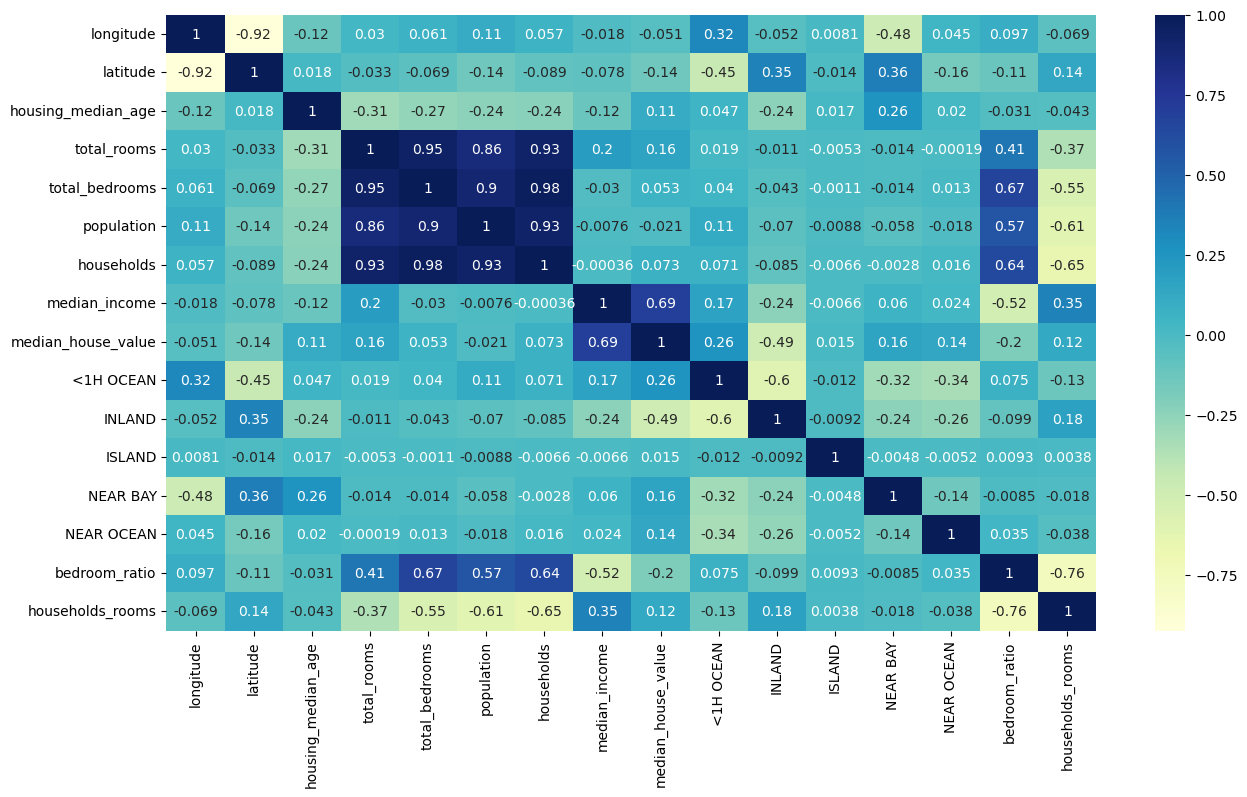

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot = True, cmap = "YlGnBu")

Linear Regression model

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train,y_train = train_data.drop(['median_house_value'],axis=1), train_data["median_house_value"]
X_train_s = scaler.fit_transform(X_train)



reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [39]:
test_data = X_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data['total_rooms']
test_data['households_rooms'] = test_data["total_rooms"] / test_data['households']



AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [ ]:
X_test,y_test = test_data.drop(['median_house_value'],axis=1), test_data["median_house_value"]

In [42]:
X_test_s= scaler.transform(X_test)

In [43]:
reg.score(X_test_s, y_test)

0.6521070902258708

In [46]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [47]:
forest.score(X_test_s,y_test)

0.8062091348032312

In [55]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()
param_grid = {
    "n_estimators" : [30,50,100],
    "min_samples_split": [2,4],
    "max_depth": [None, 4,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score = True)
grid_search.fit(X_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [59]:
grid_search.best_estimator_

RandomForestRegressor()

In [60]:
grid_search.best_estimator_.score(X_test_s, y_test)

0.805555023298343

In [61]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": np.arange(30, 151, 10),  # Generates values from 30 to 150 with a step of 10
    "max_features": np.arange(5, 21, 5),      # Generates values from 5 to 20 with a step of 5
    "min_samples_split": np.arange(2, 11, 2)  # Generates values from 2 to 10 with a step of 2
}

# Example of using RandomizedSearchCV
randomized_search = RandomizedSearchCV(forest, param_distributions=param_grid, n_iter=10, cv=5, scoring="neg_mean_squared_error", random_state=42)

In [63]:
randomized_search.fit(X_train_s,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': array([ 5, 10, 15, 20]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10]),
                                        'n_estimators': array([ 30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150])},
                   random_state=42, scoring='neg_mean_squared_error')

Scores

In [64]:
# Get the best estimator (model with the best hyperparameters)
best_model = randomized_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_s)

# Evaluate the performance of the model using appropriate metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2544087964.641835
R-squared: 0.8051795398375069


Support Vector Machine

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

scaler = StandardScaler()
svr = SVR(kernel='linear', C=1.0)

In [67]:
svr.fit(X_train_s, y_train)

SVR(kernel='linear')

In [69]:
# Make predictions on the test set
y_pred = svr.predict(X_test_s)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 11333273396.787474
R-squared: 0.13212374375572344
